In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras
import matplotlib.pyplot as plt #This package is for plotting
%matplotlib inline  
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import SGD
from keras.initializers import RandomNormal
from keras.models import load_model

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# Reshape x_train and x_test
x_train = np.reshape(x_train,[-1, 28*28])
x_test = np.reshape(x_test,[-1, 28*28])

In [6]:
x_train = x_train/np.max(x_train)
x_test = x_test/np.max(x_train)

In [7]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [8]:
model = Sequential()
# Add the layers to model here.
model.add(Dense(512, activation='relu', input_shape=(784,), kernel_initializer= RandomNormal(0,0.01)))
model.add(Dense(512, activation='relu', kernel_initializer= RandomNormal(0,0.01)))
model.add(Dense(10, activation='softmax', kernel_initializer= RandomNormal(0,0.01)))
sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics = ['accuracy'])

In [16]:
history = model.fit(x_train, y_train,
                    batch_size = 32,
                    epochs = 10,
                    verbose = 1,
                    validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s 197us/step - loss: 0.0549 - acc: 0.9858 - val_loss: 0.0899 - val_acc: 0.9748
Epoch 2/10
48000/48000 [==============================] - 9s 194us/step - loss: 0.0518 - acc: 0.9870 - val_loss: 0.0904 - val_acc: 0.9737
Epoch 3/10
48000/48000 [==============================] - 9s 182us/step - loss: 0.0487 - acc: 0.9876 - val_loss: 0.0883 - val_acc: 0.9755
Epoch 4/10
48000/48000 [==============================] - 8s 173us/step - loss: 0.0462 - acc: 0.9881 - val_loss: 0.0887 - val_acc: 0.9742
Epoch 5/10
48000/48000 [==============================] - 8s 170us/step - loss: 0.0439 - acc: 0.9890 - val_loss: 0.0851 - val_acc: 0.9762
Epoch 6/10
48000/48000 [==============================] - 8s 164us/step - loss: 0.0413 - acc: 0.9899 - val_loss: 0.0859 - val_acc: 0.9751
Epoch 7/10
48000/48000 [==============================] - 8s 162us/step - loss: 0.0393 - acc: 0.9905 - val_loss: 0.0851 - 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


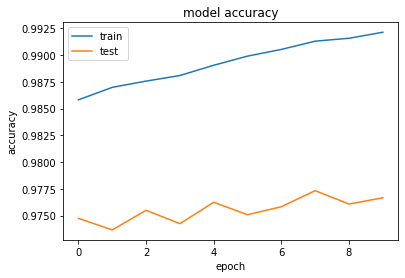

In [17]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

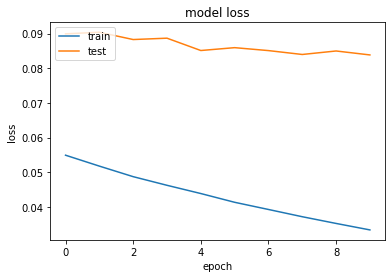

In [19]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
from keras.callbacks import TensorBoard

tensor_board = TensorBoard(log_dir='./Graph')

model.fit(x_train, y_train, epochs=10, callbacks=[tensor_board])

Epoch 1/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.1483 - acc: 0.9575
Epoch 2/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.1354 - acc: 0.9611
Epoch 3/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.1247 - acc: 0.9642
Epoch 4/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.1150 - acc: 0.9675
Epoch 5/10
14176/60000 [======>.......................] - ETA: 5s - loss: 0.1101 - acc: 0.9684

KeyboardInterrupt: 